In [1]:
import numpy as np
from Coursework.ANNModel import model as mod
from Coursework.ANNModel import data as d
from Coursework.PSO import pswarm as ps
from Coursework.PSO import psobehaviour as psh
from Coursework.PSO import history as hs
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

### Experiment results - best PSO hyperparameters
#### These hyperparameters were found using a neural network with 1 hidden layer with 4 neurons and a single neuron output layer.

In [2]:
# Cubic (10 runs) mean fitness: 44.37869624714425
Cubic_pso_config_mean = [91.38785822,  6.52696304,  0.59416449,  0.43559926,  0.29415449,
        1.29923762,  0.73352514]

# Linear (10 runs) mean fintess: 1103190071387.8752
Linear_pso_config_mean = [85.37707185,  6.86909089,  0.51382895,  0.9798064,  0.12477974, 0.59493009,  0.89702589]

# Tanh (10 runs) mean fitness: 25.520455427936067
Tanh_pso_config_mean = [55.32621771,  7.52578441,  0.12798331,  0.72531664,  1.08313114, 0.29216353,  1.3627685 ]

# Sine (10 runs) mean fitness: 434
Sine_pso_config_mean = [8.73729926e+01, 7.54895398e+00, 7.33998847e-01, 7.52228076e-02,
       2.92737853e-01, 3.09977124e-01, 8.51531051e-01]

# Complex (10 runs) mean fitness: 12
Complex_pso_config_mean = [82.66312781,  5.85540776,  0.62559032,  0.58225519,  0.26541185,
        1.38181036,  0.6510299 ]

# Xor (10 runs) mean fitness: 2710748526
Xor_pso_config_mean = [96.15250011,  7.08445513,  0.53364588,  0.62468836,  1.57375821,
        1.50229261,  0.17895104]


### Experiment results - best ANN hyperparameters
#### These represent the single highest scoring hyperparameters for each dataset from the above experiment

In [3]:
# Cubic Most fit model: 109.50653486975476
Cubic_ann_params = np.array([ 5.3012172 , -0.57272851, -0.29479981,  0.80752501, -0.45059291,
       -0.37421024, -0.75524689, -0.44855557,  0.89593846,  0.21242254,
        0.65222056, -0.53284427, -0.79926862, -0.79949714,  0.96237351])

# Linear Most fit model: 10965948279221.076
Linear_ann_params = np.array([ 0.15520314,  0.2222954 ,  0.47238101, -0.83439247, -0.27726962,
        0.11339216, -0.7816949 , -0.79196132, -0.3392678 ,  0.41548984,
       -0.08055252,  0.12817675, -0.71425698, -0.21576561, -0.7553213 ])

# Tanh Most fit model: 39.38730853575883
Tanh_ann_params = np.array([ 0.09854553,  0.39395654, -0.33737974, -0.12358008,  0.4334227,
       -0.98235414, -0.99205521,  0.98638961, -0.97515305,  2.33845816,
        0.51783499, -0.96708832, -0.9922467 ,  0.9696207 , -0.99365926])

# Sine Most fit model: 4212
Sine_ann_params = np.array([ 0.26515734,  0.7400037 , -0.0499965 ,  0.32639921,  0.03951493,
        0.93575309,  0.82658881,  0.95566027,  0.89756768,  3.01482873,
       -0.62419448, -0.9322514 , -0.99330274, -0.85322129, -0.65752741])

# Complex Most fit model: 15.36
Complex_ann_params = np.array([ 5.16794124, -0.50701965, -0.02085653, -0.67915966, -0.56917589,
        0.93068562,  0.25302176,  0.92653444,  0.67209426,  0.39299595,
       -0.75832145, -0.44806736, -0.62409455,  2.26094952, -0.26506833,
       -0.86461154,  0.31096583,  0.90781783,  0.72454439])

# Xor Most fit model: 27107485189
Xor_ann_params = np.array([-0.13057076, -0.66250843,  0.0122888 , -0.4294471 , -0.56088656,
        0.76634383,  0.95302873,  0.27348615,  0.86272884,  0.79509781,
        0.80510636,  0.08453014,  0.86190117,  3.37130705, -0.79043449,
        0.74686407,  0.4886179 , -0.22842822,  0.69471657])

### Best ANN hyperparameters for sine 
#### Represent the single highest scoring hyperparameters for sine with 2 layers, 10 and 1 nueron, respectivel.

In [4]:
# Perfect sine 2 layers, 10 and 1 nueron, respectively, fit model: 44953126.382
sine_perfect_ann_params = np.array([-0.25818031,  0.24602807, -0.19954074,  0.04878103, -0.78336731,
        0.4439194 , -0.0687731 ,  0.18246371,  0.07101439, -0.77758498,
        0.54664593, -0.75110509,  0.79253988, -0.03818846,  0.41410888,
        0.84921967,  0.82777535,  0.77634862,  0.66577223, -0.35187904,
        0.02567717,  3.02333364, -0.58409807,  0.78615987,  0.28270697,
       -0.12596374, -0.1707629 , -0.86163061, -0.77290372, -0.75079991,
       -0.90132633,  0.35107315, -0.80017526])

## Prepare data and models
### Import and split the data into train and test using sklearn
### Declare what ANN and PSO configs to use from cells above

In [5]:
data = d.Data("./Data/1in_tanh.txt")
decimals = 'tanh'
X = data.get_rows()
y = data.get_output()

psoParams = Tanh_pso_config_mean
annParams = Tanh_ann_params

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=14)

### Define models for the tests, separate models for train and test to separate their history 

In [6]:
#train the model
train_model = mod.ANN()
train_model.set_training_input(X_train, y_train)
train_model.add(mod.Layer(4, activation="sigmoid"))
train_model.add(mod.Layer(1, activation="null"))
train_model.compile()

test_model = mod.ANN()
test_model.set_training_input(X_train, y_train)
test_model.add(mod.Layer(4, activation="sigmoid"))
test_model.add(mod.Layer(1, activation="null"))
test_model.compile()


Model Compiled!
Model Compiled!


In [7]:
pso = ps.PSO(termination_args={'max_iter': 400}, verbose=True)
pso = pso.decode_vec(psoParams)
print('Sanity check swarm size: ',pso.swarm_size)

Sanity check swarm size:  55


In [8]:
train_model_history = hs.PSOHistory(train_model, num_particles=pso.swarm_size, num_iterations=400)

### Run experiment with the PSO hyperparameters calculated by meta-PSO 
#### This will find the 10 most fit ANN parameters, produce a mean score*, Fitness, and loss for both test and train.

*This accuracy is calculated with an absolute tolerance of 0.03 for all tests

In [9]:
pso.set_search_dimensions(train_model_history.dimension_vec())
pso.set_fitness_fn(train_model_history.evaluate_fitness)

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

for i in range(10):
    fitness = pso.run()
    # Evaluating on training set
    train_model.set_training_input(X_train, y_train)
    train['fitnessList'].append(train_model.evaluate_fitness(fitness.location))
    score = data.score(train_model, decimals, atol=0.03)
    train['scoreA'].append(score[0])
    train['scoreB'].append(score[1])
    train['lossList'].append(train_model.loss)
    # Evaluating on testing set
    test_model.set_training_input(X_test, y_test)
    test['fitnessList'].append(test_model.evaluate_fitness(fitness.location))
    score = data.score(test_model, decimals, atol=0.03)
    test['scoreA'].append(score[0])
    test['scoreB'].append(score[1])
    test['lossList'].append(test_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))

Fitness: 27.817084129818337:   0%|          | 0.0/100 [00:06<?, ?it/s]
Fitness: 27.914699717575836:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 21.192050305198418:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 29.52613223526674:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 22.44798613215678:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 24.854605946385753:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 33.85982266306026:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 25.56900293861238:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 24.999998609629614:   0%|          | 0.0/100 [00:05<?, ?it/s]
Fitness: 14.723176354191262:   0%|          | 0.0/100 [00:05<?, ?it/s]Testing on train - A:  0.3358208955223881  B:  0.3358208955223881  Fitness:  25.29  Loss:  0.041
Testing on test - A:  0.2941176470588235  B:  0.2941176470588235  Fitness:  17.358  Loss:  0.06



### Run experiment with the best ANN activation functions and weights found by PSO
#### This will test and produce a mean score*, Fitness, and loss for both test and train.

*This accuracy is calculated with an absolute tolerance of 0.03 for all tests

In [10]:
best_model = mod.ANN()
best_model.set_training_input(X_train, y_train)
best_model.add(mod.Layer(4, activation="sigmoid"))
best_model.add(mod.Layer(1, activation="null"))
best_model.compile()


Model Compiled!


### Run experiment with the best ANN discovered from Meta-PSO 
#### This will produce an score*, Fitness, and loss for both test and train.

*This accuracy is calculated with an absolute tolerance of 0.03 for all tests

In [11]:
best_model.decode_vec(annParams)
best_model.one_pass()

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

# Evaluating on training set
best_model.set_training_input(X_train, y_train)
train['fitnessList'].append(best_model.evaluate_fitness(annParams))
score = data.score(best_model, decimals, atol=0.03)
train['scoreA'].append(score[0])
train['scoreB'].append(score[1])
train['lossList'].append(best_model.loss)
# Evaluating on testing set
best_model.set_training_input(X_test, y_test)
test['fitnessList'].append(best_model.evaluate_fitness(annParams))
score = data.score(best_model, decimals, atol=0.03)
test['scoreA'].append(score[0])
test['scoreB'].append(score[1])
test['lossList'].append(best_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))


Testing on train - A:  0.4925373134328358  B:  0.4925373134328358  Fitness:  39.387  Loss:  0.025
Testing on test - A:  0.38235294117647056  B:  0.38235294117647056  Fitness:  24.1  Loss:  0.041


In [12]:
mean_10_run_best_fitness, mean_10_run_best_location = train_model_history.best_particle()

In [13]:
train_particle_fitness_dict = train_model_history.historical_particle_fitness()
train_particle_location_dict = train_model_history.historical_particle_location()

In [14]:
train_model_history.reshape_lists()


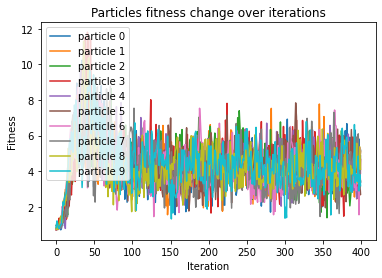

In [15]:
train_model_history.plot_fitness()

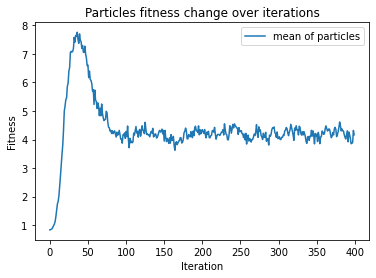

In [16]:
train_model_history.plot_mean_fitness()

### Run experiment with the best ANN hyperparameters calculated by PSO 
#### This will produce a mean score*, Fitness, and loss for both test and train.
#### Determinated  by 10 runs earlier in this notebook

*This accuracy is calculated with an absolute tolerance of 0.03 for all tests

In [17]:
best_model = mod.ANN()
best_model.set_training_input(X_train, y_train)
best_model.add(mod.Layer(4, activation="sigmoid"))
best_model.add(mod.Layer(1, activation="null"))
best_model.compile()


Model Compiled!


In [18]:
best_model.decode_vec(mean_10_run_best_location)
best_model.one_pass()

train ={
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

test = {
    'scoreA' : [],
    'scoreB' : [],
    'fitnessList': [],
    'lossList': []
}

# Evaluating on training set
best_model.set_training_input(X_train, y_train)
train['fitnessList'].append(best_model.evaluate_fitness(mean_10_run_best_location))
score = data.score(best_model, decimals, atol=0.03)
train['scoreA'].append(score[0])
train['scoreB'].append(score[1])
train['lossList'].append(best_model.loss)
# Evaluating on testing set
best_model.set_training_input(X_test, y_test)
test['fitnessList'].append(best_model.evaluate_fitness(mean_10_run_best_location))
score = data.score(best_model, decimals, atol=0.03)
test['scoreA'].append(score[0])
test['scoreB'].append(score[1])
test['lossList'].append(best_model.loss)

print("Testing on train - A: ", np.mean(train['scoreA']), " B: ", np.mean(train['scoreB']), " Fitness: ", round(np.mean(train['fitnessList']), 3), " Loss: ", round(np.mean(train['lossList']), 3))
print("Testing on test - A: ", np.mean(test['scoreA']), " B: ", np.mean(test['scoreB']), " Fitness: ", round(np.mean(test['fitnessList']), 3), " Loss: ", round(np.mean(test['lossList']), 3))


Testing on train - A:  0.4626865671641791  B:  0.4626865671641791  Fitness:  33.86  Loss:  0.03
Testing on test - A:  0.38235294117647056  B:  0.38235294117647056  Fitness:  22.592  Loss:  0.044


### Run ANN and display scatter graph showing actual and predicted values

In [19]:
curve_model = mod.ANN()
curve_model.set_training_input(X_train, y_train)
curve_model.add(mod.Layer(4, activation="sigmoid"))
curve_model.add(mod.Layer(1, activation="null"))
curve_model.compile()

curve_model_history = hs.PSOHistory(curve_model, num_particles=pso.swarm_size, num_iterations=400)

Model Compiled!


In [20]:
curve_model_history = hs.PSOHistory(curve_model, num_particles=pso.swarm_size, num_iterations=400)

In [21]:
curve_model.set_training_input(X, y)

curve_model.decode_vec(Tanh_ann_params)
curve_model.one_pass()

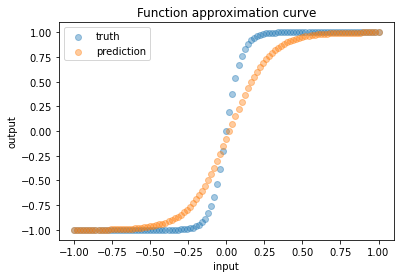

In [22]:
curve_model_history.plot_curve()